In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = '/content/winequality-red.csv' # this is red wine csv file
df = pd.read_csv(url)

In [16]:
df = pd.read_csv(url, delimiter=';')
df.head()  # to display the first few rows
df.info()  # to display the data types and non-null values
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


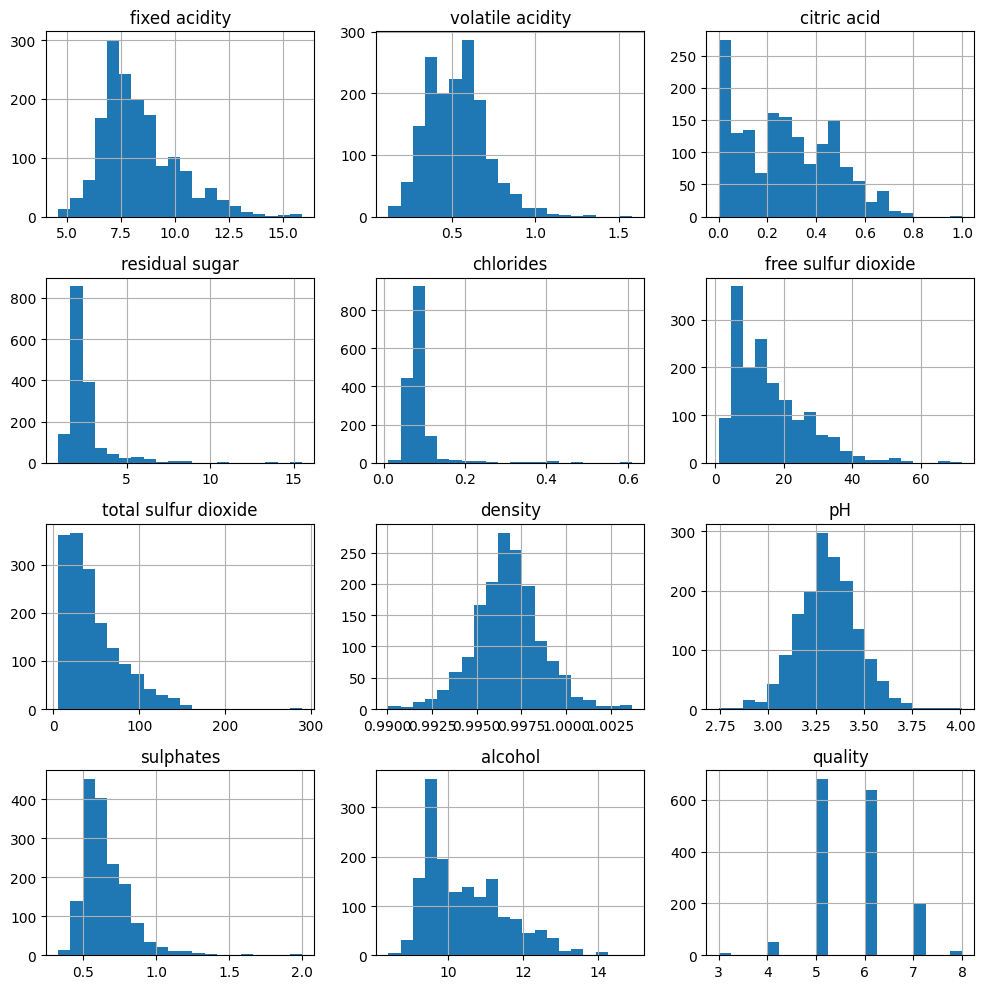

In [17]:
# Histogram of all numerical features
df.hist(figsize=(10,10), bins=20)
plt.tight_layout()

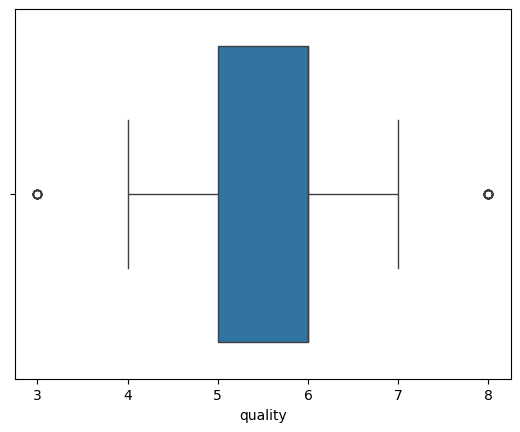

In [18]:
# Box plot for quality scores
sns.boxplot(x='quality', data=df)
plt.show()


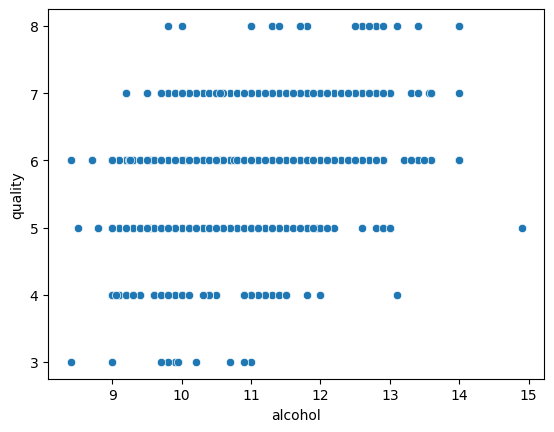

Correlation coefficient between alcohol content and wine quality: 0.47616632400113584


In [19]:
# Scatter plot to visualize the relationship between alcohol content and quality
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.show()

# Computing the correlation coefficient
correlation = df['alcohol'].corr(df['quality'])
print(f"Correlation coefficient between alcohol content and wine quality: {correlation}")


In [21]:
# Print the column names to check for issues
print(df.columns.tolist())
# Ensure you're using the semicolon delimiter when reading the CSV
df = pd.read_csv(url, delimiter=';')


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


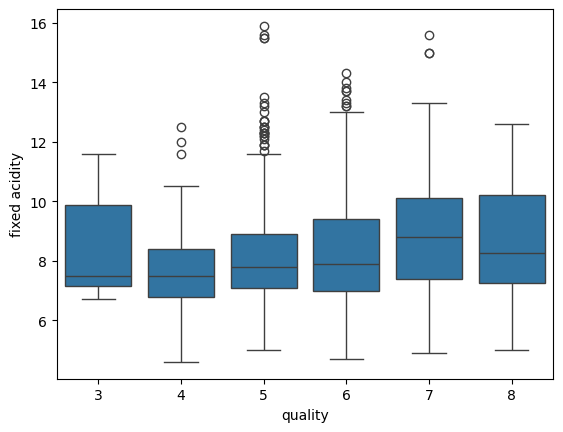

F-statistic: 6.283081158221344, P-value: 8.793966623816744e-06


In [22]:
# Visualizing with a box plot
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.show()

# One-way ANOVA test to see if mean quality scores are different across different levels of fixed acidity
from scipy.stats import f_oneway

# Group data by quality score
grouped = df.groupby('quality')['fixed acidity']

# ANOVA test
f_statistic, p_value = f_oneway(*[group[group.index] for name, group in grouped])
print(f"F-statistic: {f_statistic}, P-value: {p_value}")



# Documentation & Reporting

**Introducation**

This report outlines the exploratory data analysis performed on a dataset concerning the physicochemical properties of red wine and their relationship with quality ratings. The dataset consists of various attributes such as acidity, sugar, pH, and alcohol content, with the goal of understanding the factors that contribute to wine quality.

**Exploratory Data Analysis**

The EDA began with an initial examination of the dataset structure, followed by a statistical summary to understand the central tendencies and distributions of the features. Histograms were plotted for each feature to visualize their distributions.

**Findings from EDA**



1.   Feature Distribution
  
  The histograms revealed that many features, such as fixed acidity, chlorides, and sulphates, are right-skewed, indicating the presence of outliers that could affect the mean.
2.   Quality Distribution

  The box plot for quality shows that the median rating is around 5 or 6, with a few outliers at the lower and higher ends of the scale.

3. Alcohol Content VS Quality

  A scatter plot of alcohol content against quality ratings suggests a positive correlation; wines with higher alcohol content often have higher quality ratings.

4. Fixed Acidity VS Quality

  The box plot across different quality ratings for fixed acidity shows significant overlap, suggesting that acidity alone might not be a strong predictor of quality.



**Hypothesis Testing**



1.   There is a positive correlation between alcohol content and wine quality.
2.   Fixed acidity levels significantly affect wine quality.



**Statistical Analysis**



*   Correlation Analysis: The correlation between alcohol content and wine quality was positive, indicating that wines with higher alcohol content tend to have higher quality ratings.

*   ANOVA on Fixed Acidity: A one-way ANOVA test did not show a statistically significant difference in fixed acidity across different quality levels, suggesting that acidity alone may not be a key determinant of quality.






**Conclustion**

The analysis suggests that while alcohol content may have a positive impact on the quality of red wine, factors such as fixed acidity do not show a clear influence. This highlights the complexity of the wine quality rating process, which likely depends on a combination of factors.

---

